#📌 Extracción

In [514]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

### Convertimos las tablas anidadas en DF separados para luegos unirlos con concat

In [516]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [517]:
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])
df_nuevo = df[['customerID','Churn']]
df_nuevo = pd.concat([df_nuevo,df_customer,df_phone,df_account], axis=1)

df_nuevo.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [518]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   Contract          7267 non-null   object 
 10  PaperlessBilling  7267 non-null   object 
 11  PaymentMethod     7267 non-null   object 
 12  Charges.Monthly   7267 non-null   float64
 13  Charges.Total     7267 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 795.0+ KB


In [519]:
df_nuevo.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
1137,1612-EOHDH,Yes,Female,0,No,No,1,Yes,No,Month-to-month,No,Electronic check,45.15,45.15
2596,3623-FQBOX,No,Male,0,No,No,21,Yes,No,Month-to-month,Yes,Mailed check,19.95,416.4
6691,9210-IAHGH,Yes,Female,0,No,No,7,Yes,No,Month-to-month,Yes,Credit card (automatic),70.75,450.8
1283,1845-CSBRZ,No,Female,1,Yes,Yes,22,Yes,Yes,Month-to-month,No,Bank transfer (automatic),85.35,1961.6
5953,8132-YPVBX,No,Female,0,No,No,6,Yes,No,Month-to-month,Yes,Mailed check,85.95,514.6
7101,9777-WJJPR,No,Male,0,Yes,No,31,Yes,Yes,Month-to-month,No,Credit card (automatic),88.65,2683.2
623,0886-QGENL,Yes,Female,1,Yes,No,27,Yes,No,Month-to-month,Yes,Electronic check,101.25,2754.45
3493,4822-YCXMX,Yes,Male,0,No,No,25,Yes,Yes,Month-to-month,Yes,Electronic check,84.80,2043.45
5456,7473-ZBDSN,No,Female,0,Yes,Yes,14,Yes,No,Two year,No,Mailed check,18.80,255.55
4444,6092-QZVPP,No,Male,0,No,No,36,Yes,No,Month-to-month,Yes,Credit card (automatic),79.20,2854.95


In [520]:
df_nuevo['Churn'] = df_nuevo['Churn'].replace('', 'no').str.upper()
df_nuevo['Churn'].unique()

array(['NO', 'YES'], dtype=object)

In [521]:
df_nuevo['gender'] = df_nuevo['gender'].str.upper()
df_nuevo['gender'].unique()

array(['FEMALE', 'MALE'], dtype=object)

In [522]:
df_nuevo['SeniorCitizen'].unique()

array([0, 1])

In [523]:
df_nuevo['Partner'] = df_nuevo['Partner'].str.upper()
df_nuevo['Partner'].unique()

array(['YES', 'NO'], dtype=object)

In [524]:
df_nuevo['Dependents'] = df_nuevo['Dependents'].str.upper()
df_nuevo['Dependents'].unique()

array(['YES', 'NO'], dtype=object)

In [525]:
df_nuevo['PhoneService'] = df_nuevo['PhoneService'].str.upper()
df_nuevo['PhoneService'].unique()

array(['YES', 'NO'], dtype=object)

In [526]:
df_nuevo['MultipleLines'] = df_nuevo['MultipleLines'].str.upper()
df_nuevo['MultipleLines'].unique()

array(['NO', 'YES', 'NO PHONE SERVICE'], dtype=object)

In [527]:
df_nuevo['Contract'] = df_nuevo['Contract'].str.upper()
df_nuevo['Contract'].unique()

array(['ONE YEAR', 'MONTH-TO-MONTH', 'TWO YEAR'], dtype=object)

In [528]:
df_nuevo['PaperlessBilling'] = df_nuevo['PaperlessBilling'].str.upper()
df_nuevo['PaperlessBilling'].unique()

array(['YES', 'NO'], dtype=object)

In [529]:
df_nuevo['PaymentMethod'] = df_nuevo['PaymentMethod'].replace('', 'no').str.upper()
df_nuevo['PaymentMethod'].unique()

array(['MAILED CHECK', 'ELECTRONIC CHECK', 'CREDIT CARD (AUTOMATIC)',
       'BANK TRANSFER (AUTOMATIC)'], dtype=object)

In [530]:
df_nuevo['Charges.Total'] = df_nuevo['Charges.Total'].map(lambda x : x.replace('$' , '').replace(',' , '').strip())
df_nuevo['Charges.Total'] = pd.to_numeric(df_nuevo['Charges.Total'], errors='coerce').astype(np.float64)
df_nuevo.fillna({'Charges.Total': 0}, inplace=True)# filtra los nulos y en la columna charges.total le asigna un 0 , con implace lo remplaza en todo el data frame
nulos = df_nuevo['Charges.Total'].isnull().sum()# sumamos y verificamos nulos
int(nulos)

0

In [531]:
#Creamos columna 'Cuentas_Diarias' que es el valor diario del valor del mes
df_nuevo['Charges.Days'] = (df_nuevo['Charges.Monthly']/30).round(1)

#📊 Carga y análisis

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica:

*'NO', 'YES', 'NO PHONE SERVICE'*

- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato :

*'ONE YEAR', 'MONTH-TO-MONTH', 'TWO YEAR'*

- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago:

*'MAILED CHECK', 'ELECTRONIC CHECK', 'CREDIT CARD (AUTOMATIC)',
       'BANK TRANSFER (AUTOMATIC)'*

- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente
- `Charges.Days`: total de todos los servicios del cliente por dia

In [532]:
df_nuevo.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Days
0,0002-ORFBO,NO,FEMALE,0,YES,YES,9,YES,NO,ONE YEAR,YES,MAILED CHECK,65.6,593.30,2.2
1,0003-MKNFE,NO,MALE,0,NO,NO,9,YES,YES,MONTH-TO-MONTH,NO,MAILED CHECK,59.9,542.40,2.0
2,0004-TLHLJ,YES,MALE,0,NO,NO,4,YES,NO,MONTH-TO-MONTH,YES,ELECTRONIC CHECK,73.9,280.85,2.5
3,0011-IGKFF,YES,MALE,1,YES,NO,13,YES,NO,MONTH-TO-MONTH,YES,ELECTRONIC CHECK,98.0,1237.85,3.3
4,0013-EXCHZ,YES,FEMALE,1,YES,NO,3,YES,NO,MONTH-TO-MONTH,YES,MAILED CHECK,83.9,267.40,2.8


# Analisis descriptivo :

In [535]:
df_nuevo[['Charges.Monthly','Charges.Total','Charges.Days']].describe().round(1)

,Charges.Monthly,Charges.Total,Charges.Days
count,7267.0,7267.0,7267.0
mean,64.7,2277.2,2.2
std,30.1,2268.6,1.0
min,18.2,0.0,0.6
25%,35.4,396.2,1.2
50%,70.3,1389.2,2.3
75%,89.9,3778.5,3.0
max,118.8,8684.8,4.0


# Distribución de evasión:

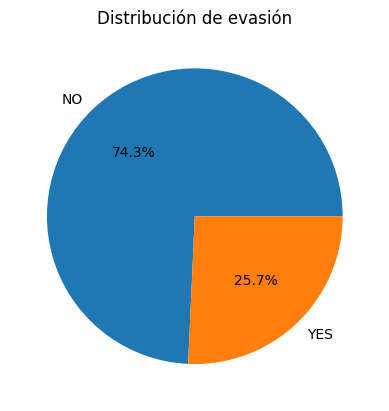

In [556]:
import matplotlib.pyplot as plt



Churn_labels = list(df_nuevo['Churn'].unique())
sizes = [int((df_nuevo['Churn'] == 'NO').sum()),int((df_nuevo['Churn'] == 'YES').sum())]
fig, ax = plt.subplots()
ax.pie(sizes, labels=Churn_labels, autopct='%1.1f%%')
ax.set_title('Distribución de evasión')
plt.show()

# Conteo de evasión por variables numéricas:

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

In [ ]:
df_evacion = df_nuevo.groupby(df_nuevo['Charges.Total'],df_nuevo[])

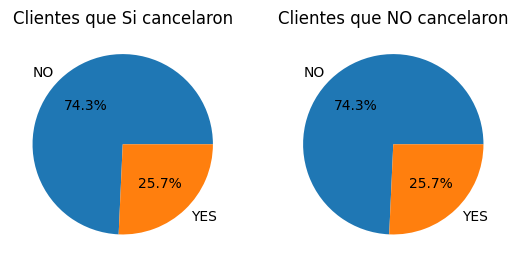

In [565]:
Churn_labels = list(df_nuevo['Churn'].unique())
sizes = [int((df_nuevo['Churn'] == 'NO').sum()),int((df_nuevo['Churn'] == 'YES').sum())]

fig, ax = plt.subplots(1,2)
ax[0].pie(sizes, labels=Churn_labels, autopct='%1.1f%%')
ax[0].set_title('Clientes que Si cancelaron')


ax[1].pie(sizes, labels=Churn_labels, autopct='%1.1f%%',)
ax[1].set_title('Clientes que NO cancelaron')

plt.show()

#📄Informe final